# Perceptron
##### Author: Chenyang Skylar Li

# Table of Contents
1. [Introduction](#introduction)
2. [Mathematical Foundations](#mathematical-foundations)
    - [Weight Update Rule](#weight-update-rule)
3. [Learning Algorithm](#learning-algorithm)
      - [Define a Perceptron Class](#define-a-perceptron-class-based-on-the-above-algorithm)
      - [Showcase the above Perceptron Class in iris dataset](#showcase-the-above-perceptron-class-in-iris-dataset)
      - [Use the Perceptron class provided by Scikit-Learn](#use-the-perceptron-class-provided-by-scikit-learn)
4. [Pros and Cons](#pros-and-cons)
5. [Suitable Tasks and Datasets](#suitable-tasks-and-datasets)
6. [References](#references)
      
## Introduction
The Perceptron, one of the earliest machine learning models, is a binary classification algorithm that was first introduced by Frank Rosenblatt in 1957. Inspired by the workings of biological neurons, Rosenblatt proposed the algorithm while he was at the Cornell Aeronautical Laboratory with an aim to create a simple model for pattern recognition tasks. As a type of artificial neuron, the Perceptron is primarily used for linearly separable datasets and serves as the foundational building block for many modern neural networks.

## Mathematical Foundations
The Perceptron computes a linear combination of input features and a bias term. The resulting value is passed through an activation function to produce the output.

`output = activation(sum(w_i * x_i) + b)`

The common activation function used in Perceptrons is the Heaviside step function or sign function:


<p align="center">
    <img src="../../assets/images/perceptron_activation_function.png" width="600">
</p>

where `z` the linear combination of the weights and input features plus the bias term. 

### Weight Update Rule

If an instance is misclassified, update the weights and bias as follows:

`w_i = w_i + learning_rate * (target - output) * x_i`

`b = b + learning_rate * (target - output)`

## Learning Algorithm

1. Initialize the weights and bias to zero or small random values.
2. For each training instance:
   - Compute the output using the activation function.
   - Update the weights and bias if the output is not correct.
3. Repeat step 2 for the desired number of epochs or until convergence.

### Define a Perceptron Class based on the above algorithm

   

In [91]:
import numpy as np

# Define a Perceptron class
class Perceptron:
    """
    Perceptron(n_features, learning_rate=0.01, epochs=1000)
    
    Perceptron, -A simple binary classification algorithm that learns a linear decision boundary between two classes.
    
    Parameters
    ----------
    n_features : int
        The number of input features for each training example.
    learning_rate : float, optional (default=0.01)
        The learning rate used to update the weights and bias during training.
    epochs : int, optional (default=1000)
        The number of iterations to train the model for.
    
    Attributes
    ----------
    weights : array-like, shape (n_features,)
        The weights learned by the perceptron during training.
    bias : float
        The bias learned by the perceptron during training.
    
    Methods
    -------
    fit(X, y)
        Train the perceptron on the given training data (input vectors X and target outputs y).
    predict(X)
        Make predictions for the given input vectors X based on the learned weights and bias.
    """
    
    # Constructor for the Perceptron class
    def __init__(self, n_features, learning_rate=0.01, epochs=1000):
        self.n_features = n_features
        self.learning_rate = learning_rate
        self.epochs = epochs
        # self.weights = np.zeros(n_features)  # Use this line to replace below line if you want to initialize the weights to zero
        self.weights = np.random.randn(n_features)  # Initialize the weights randomly
        self.bias = 0  # Initialize the bias to zero
        
    # Define the predict method for the Perceptron class
    def predict(self, X):
        """
        Make predictions for the given input vectors X based on the learned weights and bias.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input data for which to make predictions.

        Returns
        -------
        array-like, shape (n_samples,)
            The predicted class labels (0 or 1) for each input vector.
        """
                
        # Calculate the linear output by taking the dot product of the input X and the weights, and adding the bias
        linear_output = np.dot(X, self.weights) + self.bias
        # Apply the heaviside step function to the linear output to get the predicted class label (0 or 1)
        return np.where(linear_output > 0, 1, 0)
        # return np.sign(linear_output)  # Use this line to replace above line if you want to use the sign function instead of the heaviside step function
    
    # Define the fit method for the Perceptron class
    def fit(self, X, y):
        """
        Train the perceptron on the given training data (input vectors X and target outputs y).

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input data to train the model.
        y : array-like, shape (n_samples,)
            The target outputs for each input vector in X.

        """
        
        # Iterate through the specified number of epochs
        for _ in range(self.epochs):
            # Iterate through each training example (input vector) and its corresponding target output
            for xi, target in zip(X, y):
                # Make a prediction for the input vector
                output = self.predict(xi)
                # Calculate the update factor for the weights and bias based on the difference between the predicted output and the target output
                update = self.learning_rate * (target - output)
                # Update the weights and bias based on the update factor and the input vector
                self.weights += update * xi
                self.bias += update

### Showcase the above Perceptron Class in iris dataset

Iris dataset is a multiclass classification problem. We will only use two features (petal length and petal width) and two classes (setosa or non-setosa) to make it a binary classification problem.

In [92]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [93]:
# Load the iris dataset and extract the features and labels
iris = load_iris(as_frame=True)
print("features:" , iris.feature_names)
print("targets class: ", iris.target_names)

features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets class:  ['setosa' 'versicolor' 'virginica']


In [94]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # We only take the these two features for simplicity
y = (iris.target == 0)  # We only predict if it is Iris setosa

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Perceptron classifier and fit it to the training data
clf = Perceptron(n_features=X_train.shape[1], learning_rate=0.1, epochs=1000)
clf.fit(X_train, y_train)

# Make predictions for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


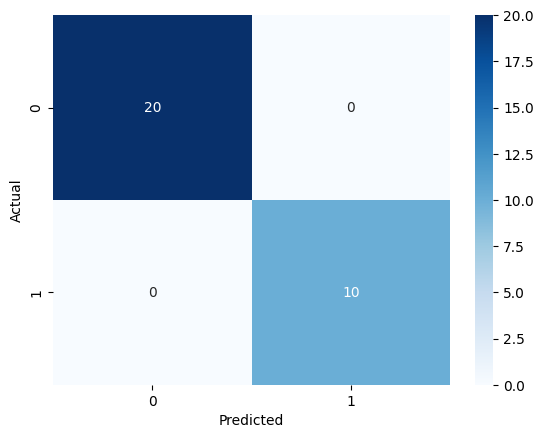

In [95]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [96]:
print(y_test[1:10])
print(X_train[1:10,])

18      True
118    False
78     False
76     False
31      True
64     False
141    False
68     False
82     False
Name: target, dtype: bool
[[-1.27600637 -1.04563275]
 [ 0.38585821  0.28921757]
 [-1.2187007  -1.31260282]
 [-1.39061772 -1.31260282]
 [ 0.72969227  0.95664273]
 [ 0.44316389  0.4227026 ]
 [-1.27600637 -1.31260282]
 [-1.33331205 -1.31260282]
 [-1.27600637 -1.44608785]]


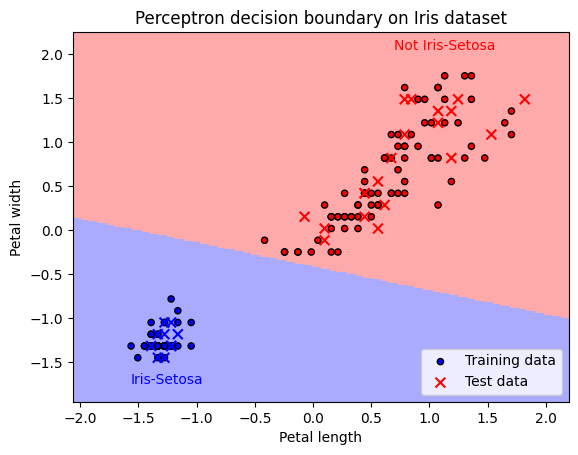

In [97]:
# Plot the decision boundary and the training and test data
# Define the step size for the meshgrid
h = 0.02  

# Define the minimum and maximum values for the x and y axes based on the training data
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

# Create a meshgrid of points to plot the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions for the meshgrid points and reshape them into the meshgrid shape
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define two color maps for the scatter plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create a new figure and axis object for the plot
fig, ax = plt.subplots()

# Plot the decision boundary as a color mesh using the light color map
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training data as circles using the bold color map
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label="Training data")

# Plot the test data as X marks using the bold color map
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=50, marker='x', label="Test data")

# Set the limits for the x and y axes to the minimum and maximum values of the meshgrid
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# Set the labels for the x and y axes and the title for the plot

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.set_title('Perceptron decision boundary on Iris dataset')
ax.legend(loc='lower right')
# Label the target information 
ax.text(xx.min() + 0.5, yy.min() + 0.2, "Iris-Setosa", color="blue")
ax.text(xx.max() - 1.5, yy.max() - 0.2, "Not Iris-Setosa", color="red")
# Show the plot
plt.show()


### Use the Perceptron class provided by Scikit-Learn

The [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) class in Scikit-Learn is a simple and efficient implementation of the Perceptron algorithm. 

Accuracy: 1.0


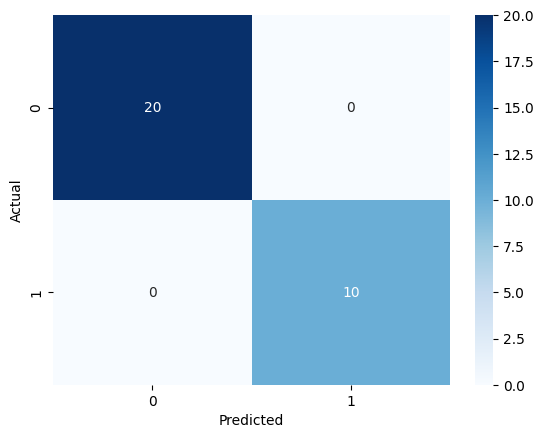

In [98]:
# Delete any previous definition of the Perceptron class
del Perceptron

# Import the Perceptron class from scikit-learn
from sklearn.linear_model import Perceptron

# Create a new instance of the Perceptron class with a random seed
per_clf = Perceptron(random_state=42)

# Train the Perceptron classifier on the training data
per_clf.fit(X_train, y_train)

# Make predictions for the test data using the trained classifier
y_pred_new = per_clf.predict(X_test)

# Evaluate the performance of the classifier using the accuracy score and confusion matrix
# Calculate the accuracy of the classifier by comparing the predicted labels to the actual labels
accuracy = np.mean(y_pred_new == y_test)

# Print the accuracy of the classifier
print("Accuracy:", accuracy)

# Generate a confusion matrix of the predicted and actual labels
cm = confusion_matrix(y_test, y_pred_new)

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Set the x and y axis labels for the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()


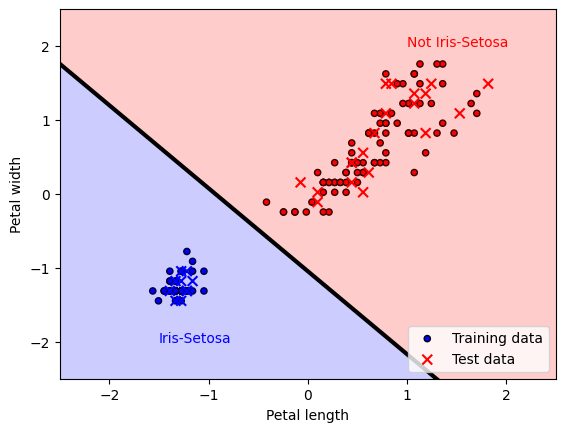

In [99]:
# Determine the coefficients and intercept of the decision boundary equation
a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]

# Define the axes limits for the plot
axes = [-2.5, 2.5, -2.5, 2.5]

# Create a meshgrid of points to plot the decision boundary
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)

# Make predictions for the meshgrid points and reshape them into the meshgrid shape
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = per_clf.predict(X_new)
zz = y_pred.reshape(x0.shape)

# Define two custom color maps for the scatter plot and the decision boundary plot
custom_cmap = ListedColormap(['red', 'blue'])
colors = ['red', 'blue']

# Create a new figure and axis object for the plot
fig, ax = plt.subplots()

# Plot the training data as circles using the bold color map
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label="Training data")

# Plot the test data as X marks using the bold color map
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=50, marker='x', label="Test data")

# Plot the decision boundary as a black line
ax.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

# Fill the area defined by the decision boundary with colors defined by the custom color map
ax.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.2)

# Set the labels for the x and y axes and the legend for the plot
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend(loc='lower right')

# Set the limits for the x and y axes to the minimum and maximum values of the meshgrid
ax.axis(axes)
# Label the target information 
ax.text(-1.5,-2.0, "Iris-Setosa", color="blue")
ax.text(1.0,2.0, "Not Iris-Setosa", color="red")

# Show the plot
plt.show()


## Pros and Cons

**Pros:**
- Simple and easy to implement.
- Efficient for linearly separable data.
- Can be used as a building block for more complex models (e.g., multi-layer perceptrons).

**Cons:**
- Cannot solve non-linearly separable problems (e.g., Exclusice OR (XOR) problem).
- Sensitive to the choice of learning rate and initial weights.
- No guarantee of convergence for non-linearly separable data.

## Suitable Tasks and Datasets

The Perceptron algorithm is a binary classification model that is well-suited to certain types of tasks and datasets:

1. **Binary Classification Tasks**: The Perceptron is designed to handle problems where each instance can be classified into one of two classes. This makes it useful for tasks such as classifying emails as spam or not spam, or classifying loan applicants as high risk or low risk.

2. **Linearly Separable Data**: The Perceptron algorithm is most effective when the classes in the data can be separated by a hyperplane in the feature space, a condition known as linear separability. If you can draw a straight line (in 2D) or a plane (in 3D) to separate the two classes in the data, then the Perceptron will be able to learn this decision boundary.

3. **Large Scale Datasets**: The Perceptron, due to its simplicity and efficiency, can effectively handle large scale datasets. It learns iteratively from the data, making it suitable for online learning tasks where data is processed sequentially.

The Perceptron is best suited for linearly separable datasets and binary classification tasks. Some examples include:
- Predicting whether an email is spam or not.
- Classifying handwritten digits (0 and 1).
- Separating two different types of plants based on their features.

## References

1. Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.
2. Minsky, M., & Papert, S. (1969). An introduction to computational geometry. Cambridge tiass., HIT, 479, 480.
3. Scikit-Learn: Perceptron. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
4. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
